In [36]:
import numpy as np
import pandas as pd

In [37]:
df = pd.read_csv('student_clustering.csv')
print("The Shape of Data is: ", df.shape)
df.head()

The Shape of Data is:  (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


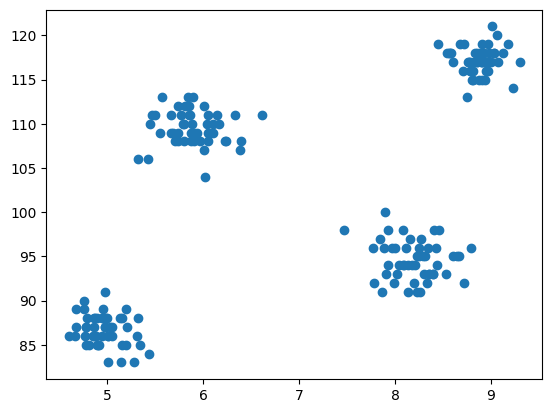

In [38]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'], df['iq'])

In [39]:
from sklearn.cluster import KMeans

In [40]:
wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

In [41]:
wcss

[29957.898287999997,
 4184.14127,
 2364.0055834200834,
 681.9696599999999,
 556.6603823704866,
 420.7484672238326,
 353.3864034832743,
 312.4576974254933,
 211.75271096620128,
 198.5349001140496]

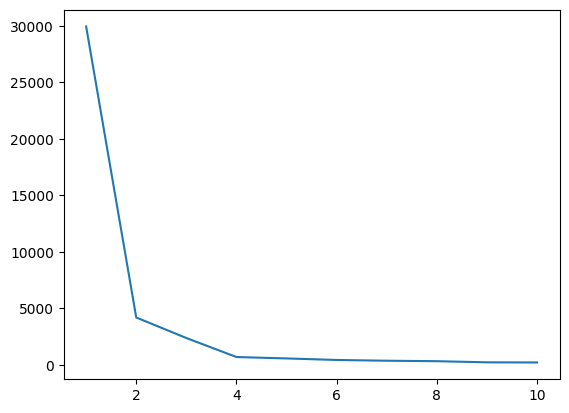

In [42]:
plt.plot(range(1, 11), wcss)

In [43]:
x = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_mean = km.fit_predict(x)

In [44]:
y_mean

array([2, 3, 0, 0, 3, 3, 0, 1, 3, 0, 2, 3, 0, 2, 3, 0, 3, 0, 3, 3, 0, 2,
       0, 2, 2, 0, 2, 1, 0, 3, 1, 3, 1, 3, 0, 0, 1, 3, 2, 3, 2, 0, 0, 2,
       1, 1, 0, 3, 1, 3, 2, 2, 1, 0, 1, 3, 3, 1, 3, 1, 3, 0, 0, 1, 2, 1,
       0, 2, 3, 0, 3, 1, 0, 2, 3, 1, 3, 1, 2, 0, 0, 1, 3, 2, 1, 2, 1, 3,
       1, 3, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1, 3, 2, 2, 1, 2, 2, 0, 2, 1, 1,
       0, 1, 3, 3, 0, 1, 0, 3, 1, 2, 2, 3, 0, 1, 0, 2, 0, 3, 2, 0, 0, 3,
       2, 2, 3, 1, 3, 2, 0, 0, 0, 2, 3, 2, 2, 1, 2, 1, 3, 2, 1, 2, 1, 1,
       2, 0, 3, 1, 3, 0, 2, 1, 3, 0, 1, 2, 3, 2, 2, 1, 1, 3, 1, 2, 2, 0,
       1, 3, 2, 1, 1, 3, 3, 3, 0, 2, 0, 0, 1, 3, 0, 0, 2, 2, 0, 2, 1, 3,
       3, 1])

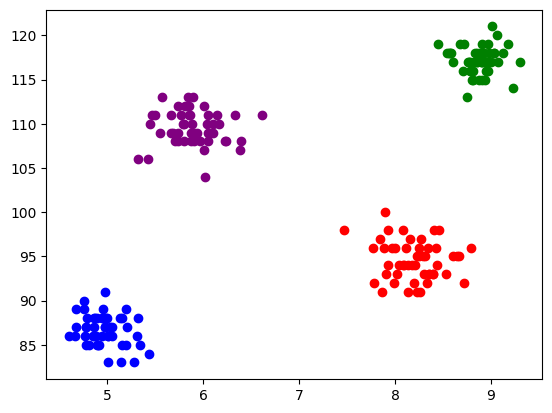

In [45]:
plt.scatter(x[y_mean == 0, 0], x[y_mean == 0, 1], color = 'red')
plt.scatter(x[y_mean == 1, 0], x[y_mean == 1, 1], color = 'green')
plt.scatter(x[y_mean == 2, 0], x[y_mean == 2, 1], color = 'blue')
plt.scatter(x[y_mean == 3, 0], x[y_mean == 3, 1], color = 'purple')
plt.show()

In [46]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5), (5,5,-5), (3.5, -2.5, 4), (-2.5, 2.5, -4)]
cluster_std = [1, 1, 1, 1]

x, y = make_blobs(n_samples=1000, centers=centroids, cluster_std=cluster_std, random_state=1)

In [47]:
x

array([[ 4.44031858,  6.37975819, -4.3975491 ],
       [ 5.2590319 ,  5.01444842, -6.47958003],
       [-5.22876583, -3.38663863,  4.62519531],
       ...,
       [-3.96701622, -5.22241403,  6.47016034],
       [-3.96682315,  2.59038025, -3.72469172],
       [ 6.49588477,  5.67545381, -4.40078676]])

In [48]:
import plotly.express as px
fig = px.scatter_3d(x = x[:,0], y = x[:,1], z = x[:,2], color = y)
fig.show()

In [49]:
wcss = []
for i in range(1, 21):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

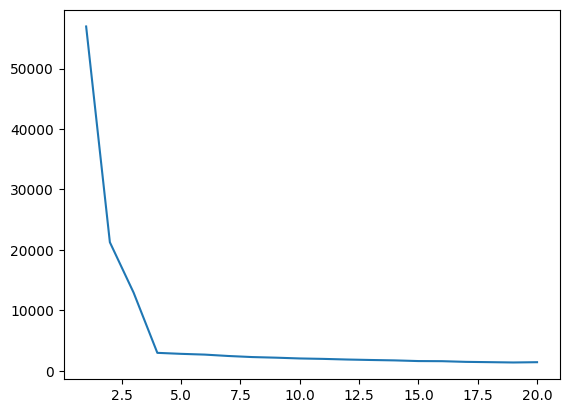

In [50]:
plt.plot(range(1, 21), wcss)

In [51]:
km = KMeans(n_clusters=4)
y_mean = km.fit_predict(x)

In [52]:
df = pd.DataFrame()
df['x'] = x[:,0]
df['y'] = x[:,1]
df['z'] = x[:,2]
df['cluster'] = y_mean

In [53]:
fig = px.scatter_3d(df, x='x', y='y', z='z', color='cluster')
fig.show()